<a href="https://colab.research.google.com/github/JennyPre/ReinforcementSimple/blob/main/LunarLander.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install gymnasium
! pip install torch torchvision
! pip install numpy matplotlib
! pip install imageio imageio-ffmpeg
! pip install mediapy

In [17]:
import gymnasium as gym
import mediapy as media

# Lunar Landar

This problem represents an optimization problem, where the engine is either full on or turned of (Pontryagin's maximum principle). The rockets trajectory should be optimized such that the rocket lands at the landing area (0,0). Environment is either discrete or continuous. The amount of fuel is not restricted, which is beneficial for learning.


Without learning, a heuristic landing run looks like this
```!python /content/lunar_lander.py```


 Step | x_position | y_position | x_velocity | y_velocity | angle | angular_velocity | left_leg_contact | right_leg_contact | Total Reward |
|------|------------|----------|------------|------------|-------|------------------|------------------|-------------------|--------------|
| 0    | -0.00      | +1.43    | -0.10      | +0.45      | +0.00 | -0.02            | +0.00            | +0.00             | +1.85        |
| 20   | -0.02      | +1.51    | -0.10      | -0.09      | -0.02 | -0.02            | +0.00            | +0.00             | +24.63       |
| 40   | -0.04      | +1.34    | -0.10      | -0.62      | -0.04 | -0.02            | +0.00            | +0.00             | -10.26       |
| 60   | -0.07      | +0.94    | -0.12      | -1.08      | -0.06 | -0.04            | +0.00            | +0.00             | -18.42       |
| 80   | -0.07      | +0.55    | +0.00      | -0.68      | -0.06 | -0.00            | +0.00            | +0.00             | +55.71       |
| 100  | -0.07      | +0.32    | +0.02      | -0.41      | -0.08 | +0.02            | +0.00            | +0.00             | +97.02       |
| 120  | -0.06      | +0.18    | +0.11      | -0.26      | -0.05 | +0.08            | +0.00            | +0.00             | +121.93      |
| 140  | -0.04      | +0.09    | +0.10      | -0.19      | +0.01 | +0.05            | +0.00            | +0.00             | +138.54      |
| 160  | -0.02      | +0.02    | +0.03      | -0.10      | +0.04 | +0.01            | +0.00            | +0.00             | +147.82      |
| 180  | -0.02      | -0.00    | +0.00      | +0.03      | -0.01 | +0.10            | +1.00            | +1.00             | +178.68      |
| 200  | -0.02      | -0.00    | -0.00      | -0.00      | -0.00 | +0.00            | +1.00            | +1.00             | +182.39      |
| 207  | -0.02      | -0.00    | +0.00      | +0.00      | -0.00 | +0.00            | +1.00            | +1.00             | +282.39      |



-100
Episode finished after 86 timesteps. Cummulative return: -324.41572006931665


""

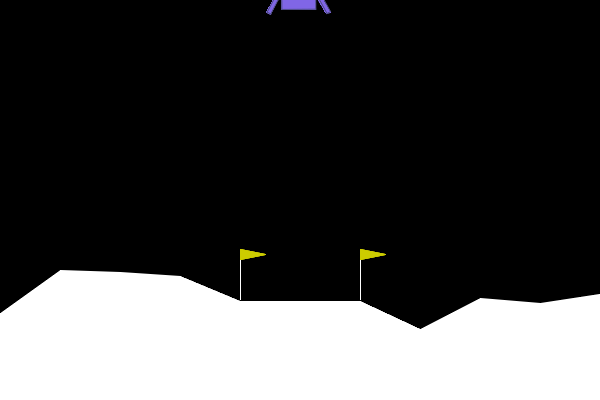

In [29]:
env = gym.make("LunarLander-v3", render_mode="rgb_array")

frames = []
observation, info = env.reset()
rewards = []


for t in range(100):
  action = env.action_space.sample()
  frames.append(env.render())
  observation, reward, terminated, truncated, info = env.step(action)
  done = terminated or truncated
  rewards.append(reward)

  if done:
    print(f"Episode finished after {t+1} timesteps. Cummulative return: {sum(rewards)}")
    break

media.show_video(frames, fps=10, codec='gif')

In [10]:
!python /content/lunar_lander.py

observations: -0.00 +1.43 -0.10 +0.45 +0.00 -0.02 +0.00 +0.00
step 0 total_reward +1.85
observations: -0.02 +1.51 -0.10 -0.09 -0.02 -0.02 +0.00 +0.00
step 20 total_reward +24.63
observations: -0.04 +1.34 -0.10 -0.62 -0.04 -0.02 +0.00 +0.00
step 40 total_reward -10.26
observations: -0.07 +0.94 -0.12 -1.08 -0.06 -0.04 +0.00 +0.00
step 60 total_reward -18.42
observations: -0.07 +0.55 +0.00 -0.68 -0.06 -0.00 +0.00 +0.00
step 80 total_reward +55.71
observations: -0.07 +0.32 +0.02 -0.41 -0.08 +0.02 +0.00 +0.00
step 100 total_reward +97.02
observations: -0.06 +0.18 +0.11 -0.26 -0.05 +0.08 +0.00 +0.00
step 120 total_reward +121.93
observations: -0.04 +0.09 +0.10 -0.19 +0.01 +0.05 +0.00 +0.00
step 140 total_reward +138.54
observations: -0.02 +0.02 +0.03 -0.10 +0.04 +0.01 +0.00 +0.00
step 160 total_reward +147.82
observations: -0.02 -0.00 +0.00 +0.03 -0.01 +0.10 +1.00 +1.00
step 180 total_reward +178.68
observations: -0.02 -0.00 -0.00 -0.00 -0.00 +0.00 +1.00 +1.00
step 200 total_reward +182.39
o

## Action Space

The action space allows four action, hence is discrete:

- do nothing (0)
- fire left orientation engine (1)
- fire main engine (2)
- fire right orientation engine (3)

## Observation Space

Is a vector:

(lander_x,
lander_y,
velocity_x,
velocity_y,
lander_angle,
angular_velocity,
left_leg_ground_contact, right_leg_ground_contact
)

## Rewards


An episode consists of n steps, for each step a reward is given. The rewards are summed up within an episode.

The reward for a step is calculated as follows:

- distance to the landing pad
- moving speed of the lander
- angle of the lander (bigger angle leads to bigger decrease)
- +10 points for each leg on the ground
- -0.03 points per frame the side engine fires
- -0.3 points per frame the main engine fires

-100/+100: save landing

A successfull episode is an episode that scores at least 200 points.

In [11]:
env = gym.make("LunarLander-v3", render_mode="human")

# Reset the environment to generate the first observation
observation, info = env.reset(seed=42)
for _ in range(1000):

    # this is where you would insert your policy
    action = env.action_space.sample()

    # step (transition) through the environment with the action
    # receiving the next observation, reward and if the episode has terminated or truncated
    observation, reward, terminated, truncated, info = env.step(action)

    # If the episode has ended then we can reset to start a new episode
    if terminated or truncated:
        observation, info = env.reset()

env.close()